# **Titanic Shipwreck.**
**Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.**

**Libraries**

In [21]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Load the data**

In [11]:
titanic_train = pd.read_csv('train.csv')
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Check for missing values**

In [4]:
def print_missing_values(dataset):
    
    df = pd.DataFrame(dataset)

    missing_values_count = df.isnull().sum()
    missing_values_percentage = (missing_values_count / len(df)) * 100

    missing_values_table = pd.DataFrame({
        'Count': missing_values_count,
        'Percentage': missing_values_percentage
    })

    missing_values_table = missing_values_table[missing_values_table['Count'] > 0]

    print("Columns with missing values:")
    print()
    print(missing_values_table)

print_missing_values(titanic_train)

Columns with missing values:

          Count  Percentage
Age         177   19.865320
Cabin       687   77.104377
Embarked      2    0.224467


**Check for duplicates**

In [5]:
titanic_train.duplicated().sum()

0

In [6]:
def find_duplicates(data):

  df = pd.DataFrame(data)

  duplicate_rows = df[df.duplicated()]

  print(duplicate_rows)

find_duplicates(titanic_train)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


## **Initial EDA**

In [ ]:
# create a data report
profile = ProfileReport(titanic_train)

profile.to_file('train_report.html')

From the data report, `Cabin` has a high number of  missing values thus it'll be dropped.<br>
`Age` has 177 missing values and this rows will be dropped.<br>
`Embarked` has only 2 missing values which will be filled with the mode.

# **Cleaning**

In [12]:
# dropping column
titanic_train.drop(['Cabin','Fare','Ticket','Name'], axis=1, inplace=True)

In [14]:
# dropping missing values
titanic_train.dropna(inplace=True)

In [15]:
titanic_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,Q
886,887,0,2,male,27.0,0,0,S
887,888,1,1,female,19.0,0,0,S
889,890,1,1,male,26.0,0,0,C


# **EDA**

In [24]:
def distribution(df, col):
    sns.histplot(df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

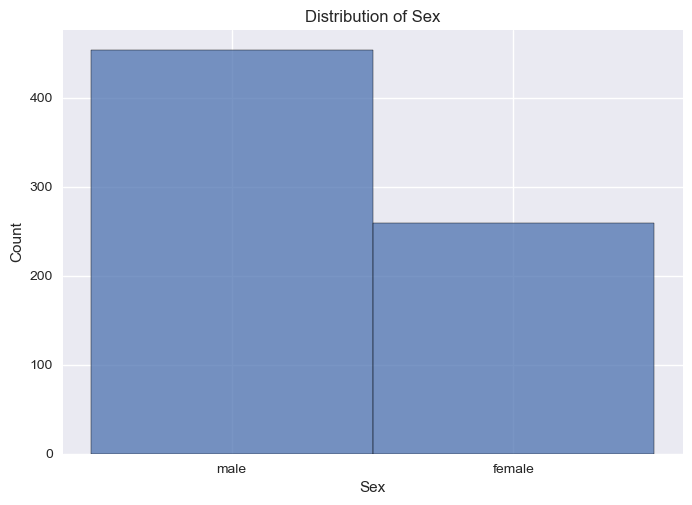

In [25]:
# Distribution of features in the clean data
distribution(titanic_train, 'Sex')

In [ ]:
# 

# **Feature Engineering**

In [6]:
titanic_test = pd.read_csv('test.csv')
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
print_missing_values(titanic_test)

Columns with missing values:

       Count  Percentage
Age       86   20.574163
Fare       1    0.239234
Cabin    327   78.229665
